# Introduction
Research suggests that speech production can be modeled as a nonlinear dynamical system, wherein small perturbations in the interaction of its parts give rise to chaotic yet deterministic behavior. Parkinson's-related impairments (e.g. tremors, etc.) to the vocal organs, muscles and nerves can affect dynamics of the entire system, suggesting that nonlinear measures  may benefit the prediction of disease stage from voice recordings. 

## Features
### Traditional measures:
  * **age**
  * **sex**
  * **shimmer** - extent of variation in amplitude from vocal cycle to vocal cycle
  * **noise-to-harmonics ratio (NHR)** -  amplitude of noise relative to tonal components of speech signal
  * **jitter** - measures pitch variation, such as vibrato and microtremor; calculated as differences in absolute frequencies of each cycle, averaged over a number of cycles
      - *Note*: Natural pitch variation exists in healthy individuals, but may be perturbed in those with vocal impairments secondary to Parkinson's. 
  
### Complex dynamical systems-based measures:

  * **correlation dimension** - used to recreate all possible states (phase space) of the system that generates speech  
  * **recurrence period density entropy (RPDE)** - this entropy measures the periodicity of the system
      - When the signal deviates from its trajectory of recurring to the same point in the phase space, this may indicate a voice disorder. Many voice disorders impair the patient's ability to sustain vocal fold vibration, which can be measured as in terms of aperiodicity.  
    
  * **detrended fluctuation analysis (DFA)** - extent of stochastic self-similarity of noise in the speech signal
      - Air blowing over vocal folds is a major cause of noise in speech, the pattern of which may be disrupted in some voice disorders. This noise can be characterized by a scaling exponent, which is higher in those with vocal disorders.  
      
  * **pitch period entropy (PPE)** - this entropy provides another measure of pitch variation (compare to **jitter**)
      - Because pitch is produced and perceived on a logarithmic scale, PPE is calculated first by converting a pitch sequence to the logarithmic semitone scale. A filter then removes natural pitch variations (such as those due to gender and individual differences), and a probability distribution of voice variations is constructed. Finally, entropy is calculated, characterizing the extent of variation beyond natural fluctuations in pitch. Increased PPE may suggest speech variations beyond those seen in healthy speech production.
      
### Target feature:

We will predict total scores on the [Unified Parkinson's disease rating scale (UPDRS)](https://neurosurgery.mgh.harvard.edu/functional/pdstages.htm), the scale most commonly used to study the long-term course of the disease. 

# Setting Up

In [156]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()
pd.options.display.max_columns=None

In [157]:
'''column 1: Subject id 

colum 2-27: features 
features 1-5: Jitter (local),Jitter (local, absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp), 
features 6-11: Shimmer (local),Shimmer (local, dB),Shimmer (apq3),Shimmer (apq5), Shimmer (apq11),Shimmer (dda), 
features 12-14: AC,NTH,HTN, 
features 15-19: Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch, 
features 20-23: Number of pulses,Number of periods,Mean period,Standard deviation of period, features 24-26: Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks 

column 28: UPDRS 
column 29: class information 
'''
data_path = '../Data/classification/'
col_names = "subject_id,Jitter (local),Jitter (local. absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local. dB),Shimmer (apq3),Shimmer (apq5), Shimmer (apq11),Shimmer (dda),AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information".split(',')
df = pd.read_csv(data_path+"train_data.txt",names=col_names)
df

,subject_id,Jitter (local),Jitter (local. absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local. dB),Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),Shimmer (dda),AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,0.905905,0.119116,11.130,166.533,164.781,10.421,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.951285,0.066758,17.403,195.252,193.289,14.773,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,0.911508,0.109983,12.212,158.689,164.768,12.981,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,0.901302,0.121982,11.384,201.997,203.471,10.853,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,0.856907,0.236831,10.653,211.887,208.440,11.499,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
5,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,15.787,0.897708,0.152955,11.987,195.952,195.222,4.692,186.593,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1
6,1,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,7.670,11.381,0.935717,0.078695,13.705,195.535,192.316,7.512,177.299,200.638,85,84,0.005199,0.000245,4.348,0,0.000,23,1
7,1,1.920,0.000099,0.926,1.031,2.777,10.184,1.108,3.650,4.611,7.127,10.951,0.898598,0.147518,12.400,196.745,194.284,5.979,181.465,201.921,71,70,0.005137,0.000215,33.929,0,0.000,23,1
8,1,2.257,0.000119,1.239,1.530,3.716,8.044,0.877,3.449,4.239,7.654,10.346,0.877616,0.217236,12.831,191.345,185.423,21.878,86.139,210.523,107,104,0.005282,0.000348,15.152,2,9.810,23,1
9,1,1.594,0.000085,0.850,0.951,2.550,7.200,0.823,2.480,3.826,9.228,7.440,0.917596,0.112336,14.039,190.838,187.775,10.087,166.895,203.133,113,112,0.005335,0.000332,0.000,0,0.000,23,1


# Exploratory Data Analysis

## Descriptive statistics and data cleaning

In [158]:
df.head()

,subject_id,Jitter (local),Jitter (local. absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local. dB),Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),Shimmer (dda),AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,0.905905,0.119116,11.130,166.533,164.781,10.421,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.951285,0.066758,17.403,195.252,193.289,14.773,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,0.911508,0.109983,12.212,158.689,164.768,12.981,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,0.901302,0.121982,11.384,201.997,203.471,10.853,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,0.856907,0.236831,10.653,211.887,208.440,11.499,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
subject_id                             1040 non-null int64
Jitter (local)                         1040 non-null float64
Jitter (local. absolute)               1040 non-null float64
Jitter (rap)                           1040 non-null float64
Jitter (ppq5)                          1040 non-null float64
Jitter (ddp)                           1040 non-null float64
Shimmer (local)                        1040 non-null float64
Shimmer (local. dB)                    1040 non-null float64
Shimmer (apq3)                         1040 non-null float64
Shimmer (apq5)                         1040 non-null float64
 Shimmer (apq11)                       1040 non-null float64
Shimmer (dda)                          1040 non-null float64
AC                                     1040 non-null float64
NTH                                    1040 non-null float64
HTN                                    10

In [160]:
df.describe()

,subject_id,Jitter (local),Jitter (local. absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local. dB),Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),Shimmer (dda),AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information
count,1040.00000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,20.50000,2.679523,0.000170,1.247053,1.348327,3.741161,12.918391,1.194895,5.699600,7.983552,12.215345,17.098839,0.846013,0.231379,9.999542,163.368286,168.727621,27.547629,134.538101,234.875990,109.744231,105.969231,0.006547,0.000843,27.682856,1.134615,12.370042,13.000000,0.500000
std,11.54895,1.765053,0.000106,0.979462,1.138742,2.938443,5.452204,0.420071,3.015183,4.840892,6.016261,9.045537,0.085709,0.151283,4.291304,56.021678,55.969913,36.672624,47.058058,121.541243,150.027703,149.417074,0.001875,0.000723,20.975294,1.614764,15.161916,15.894745,0.500241
min,1.00000,0.190000,0.000006,0.062000,0.081000,0.185000,1.185000,0.103000,0.496000,0.708000,0.517000,1.488000,0.539566,0.002106,0.695000,81.460000,82.363000,0.533000,67.957000,85.541000,0.000000,0.000000,0.002039,0.000055,0.000000,0.000000,0.000000,1.000000,0.000000
25%,10.75000,1.507500,0.000095,0.617000,0.665750,1.851750,9.353500,0.941000,3.703000,5.160250,8.079500,11.109500,0.803026,0.126890,7.510250,124.075750,126.594750,7.295500,100.852250,143.650750,42.750000,40.750000,0.005039,0.000404,8.149250,0.000000,0.000000,1.000000,0.000000
50%,20.50000,2.396000,0.000151,1.035500,1.126500,3.107000,12.348500,1.181500,5.134500,7.050500,11.418659,15.403000,0.856899,0.206196,9.638000,150.636000,154.732500,12.773500,127.277000,195.971000,65.000000,62.000000,0.006484,0.000644,26.501000,1.000000,5.826000,3.000000,0.500000
75%,30.25000,3.411500,0.000229,1.602500,1.694750,4.808500,15.493250,1.411000,6.942000,9.558930,15.306125,20.826000,0.904218,0.297583,12.087250,192.476750,201.220500,27.553000,159.664750,263.798250,113.000000,109.000000,0.007923,0.000980,43.064250,1.000000,22.255500,23.250000,1.000000
max,40.00000,14.376000,0.000777,8.016000,13.542000,24.048000,41.137000,2.721000,25.820000,72.860000,44.764000,77.459000,0.997904,0.869277,28.418000,468.618000,470.456000,293.877000,452.083000,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,12.000000,69.117000,55.000000,1.000000


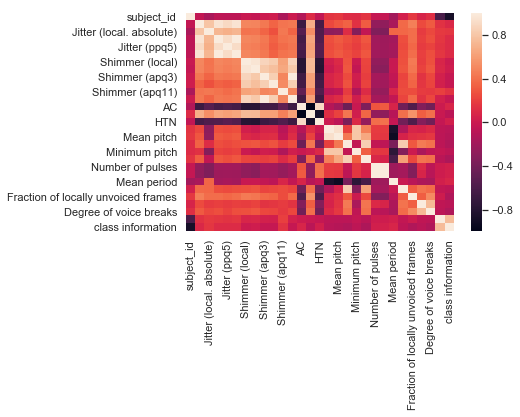

In [161]:
corr = df.corr()
sns.heatmap(corr)

Since we were unable to extract certain vocal features, we had to drop several columns and make do with what can extract.

Apart from vocal features, we drop test time and subject id, because we cannot use this

In [162]:
df["class information"].value_counts()

1    520
0    520
Name: class information, dtype: int64

In [163]:
columns_to_drop = "subject_id,AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks".split(',')
def to_target(val):
    if val==0:
        return False
    return True
df.UPDRS = df.UPDRS.astype('float')
df_new = df.drop(columns=columns_to_drop)

df_new["class information"] = df_new["class information"].apply(to_target)
#columns_to_drop = ["subject#","test_time"] + ["NHR","HNR","RPDE","DFA","PPE","Jitter(%)"]
df_new

,Jitter (local),Jitter (local. absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local. dB),Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),Shimmer (dda),UPDRS,class information
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,23.0,True
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,23.0,True
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,23.0,True
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,23.0,True
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,23.0,True
5,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,15.787,23.0,True
6,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,7.670,11.381,23.0,True
7,1.920,0.000099,0.926,1.031,2.777,10.184,1.108,3.650,4.611,7.127,10.951,23.0,True
8,2.257,0.000119,1.239,1.530,3.716,8.044,0.877,3.449,4.239,7.654,10.346,23.0,True
9,1.594,0.000085,0.850,0.951,2.550,7.200,0.823,2.480,3.826,9.228,7.440,23.0,True


### UPDRS Scores
Below we can see marked differences in the distributions of UPDRS scores between men and women. 
  
The distribution of female scores shows the majority are clustered around the mean, with wide tails in both directions. The distribution of male scores is--interestingly enough--pear-shaped (or more specifically, pear-shaped with dual top and bottom stems, shorter and much narrower than those seen in the female UPDRS distribution). Though the male UPDRS average is close to that of the female group, broader quartiles suggest much greater variability in the course of disease for males compared to women. 

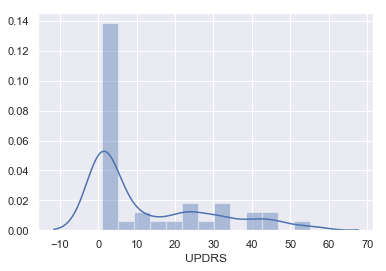

In [164]:
sns.distplot(df_new["UPDRS"])

We see that most individuals' scores increase steadily over time in the study, though several subjects maintain or even drastically decrease their scores over the course of the study. 

# Statistical analysis

## Continuous variable comparisions using the pearson correlation test

In [165]:
def pearson_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the pearson correlation test of all the columns with the target variable.
    The anova test tests the null hypothesis that the population median of all of the groups are equal.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    '''
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype=='float']
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    for column in columns:
        assert df[column].dtype == 'float',"This function is intended for quantative indipendent variables"
    useful_columns = []
    for column in columns:
            if column == target:
                continue
            print("For "+column+" :-")
            res = scipy.stats.pearsonr(df[column],df[target])
            if verbose:
                print(res)
            if res[1] < alpha :
                print("Reject null hypothesis\n----------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n----------------")
    print("According to the test, the useful columns are :-\n"+", ".join(useful_columns))

In [166]:
df_new.UDPRS = df_new.UPDRS.astype('float')
pearson_wrapper(df_new,"UPDRS")

For Jitter (local) :-
Reject null hypothesis
----------------
For Jitter (local. absolute) :-
Reject null hypothesis
----------------
For Jitter (rap) :-
Reject null hypothesis
----------------
For Jitter (ppq5) :-
Reject null hypothesis
----------------
For Jitter (ddp) :-
Reject null hypothesis
----------------
For Shimmer (local) :-
Reject null hypothesis
----------------
For Shimmer (local. dB) :-
Reject null hypothesis
----------------
For Shimmer (apq3) :-
Accept null hypothesis
----------------
For Shimmer (apq5) :-
Accept null hypothesis
----------------
For  Shimmer (apq11) :-
Reject null hypothesis
----------------
For Shimmer (dda) :-
Accept null hypothesis
----------------
According to the test, the useful columns are :-
Jitter (local), Jitter (local. absolute), Jitter (rap), Jitter (ppq5), Jitter (ddp), Shimmer (local), Shimmer (local. dB),  Shimmer (apq11)


d:\installed\pycharmedu4.0.1\anaconda\envs\virtusa\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


## Categorical variables and UPDRS comparisions

Let's check if the UDPRS scores are normally distributed

In [167]:
scipy.stats.normaltest(df_new["UPDRS"])

NormaltestResult(statistic=142.4872076982142, pvalue=1.1462938897437916e-31)

Normal test results can be understood as follows:-

null hypothesis : x comes from a normal distribution

alternate hypothesis : x doesnot come from a normal distribution

According to test, p value was very less, hence we reject the null hypothesis that total updrs is normally distributed. Hence we perform the non parametric test for age

In [168]:
def kruskal_wallis_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the Kruskal-Wallis H-test of all the columns with the target variable.
    The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    '''
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype=='object']
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    for column in columns:
        assert df[column].dtype == 'object',"This function is intended for categorical indipendent variables"
    useful_columns = []
    for column in columns:
            print("For "+column+" :-")
            groups = df.groupby(column)
            data = [groups.get_group(x)[target] for x in groups.groups]
            res = scipy.stats.kruskal(*data)
            if verbose:
                print(res)
            if res.pvalue < alpha :
                print("Reject null hypothesis\n----------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n----------------")
    print("According to the test, the useful columns are :-\n"+",".join(useful_columns))

In [169]:
kruskal_wallis_wrapper(df_new,"UPDRS")

According to the test, the useful columns are :-



# Model Building

In [170]:
def create_pipe_model(model):
    '''
    Returns a pipeline with the 4 steps:-
    1)Scaling the data
    2)Feature selection or dimentionality reducion
    3)Regression
    '''
    return Pipeline([
                  ('scale',preprocessing.Normalizer()),
                  ('feature_selection', SelectFromModel(model)),
                  ('Regression', model)
                    ])
def run_model(pipe,param_dict,verbose=True,n_jobs=-1):
    clf = GridSearchCV(pipe,param_dict,verbose=verbose,n_jobs=n_jobs,error_score=0.0).fit(X_train,y_train)
    print("Training score : ",clf.score(X_train,y_train))
    print("Testing score : ",clf.score(X_test,y_test))
    print("Best params : ",clf.best_params_)
    return clf

In [171]:
final_df = df_new.copy()
final_df["class information"].value_counts()

True     520
False    520
Name: class information, dtype: int64

In [172]:
targets=final_df['class information']
features = final_df.drop(columns=['class information','UPDRS'])
features.head()

,Jitter (local),Jitter (local. absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local. dB),Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),Shimmer (dda)
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307


In [173]:
targets.head()

0    True
1    True
2    True
3    True
4    True
Name: class information, dtype: bool

In [174]:
X_train,X_test,y_train,y_test = train_test_split(features,targets,random_state=2,test_size=0.3,stratify=targets)

In [175]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
clf = MLPClassifier(hidden_layer_sizes=(200,600,400,200,50,36,100,79,8),random_state=50,validation_fraction=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6217948717948718

In [176]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.592948717948718

In [177]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5705128205128205

In [178]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(list(y_test),list(clf.predict(X_test)))
print(cm)

Predicted  False  True  __all__
Actual                         
False         81    75      156
True          59    97      156
__all__      140   172      312


In [179]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
clf = Pipeline([
  ('std',preprocessing.StandardScaler()),
  #('transform', preprocessing.QuantileTransformer()),
  #('feature_selection', SelectFromModel(SVC())),
  ('Classification', SVC())
])
parameters = {'kernel':['rbf'], 'C':[1,2]}
#clf = GridSearchCV(SVC(), parameters,verbose=True,n_jobs=4)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.6410256410256411

In [180]:
def showFeatureImportance(model):
    #FEATURE IMPORTANCE
    # Get Feature Importance from the classifier
    feature_importance = model.feature_importances_

    # Normalize The Features
    feature_importance = 100.0 * (feature_importance / Feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    #plot relative feature importance
    plt.figure(figsize=(12, 12))
    plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
    plt.yticks(pos, np.asanyarray(X_cols)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance')
    plt.show()

### To do :-
* **Grid search**
* **Consider other regressors**